# Arima/Auto Arima

Não é o mais recomendado, pois o nosso problema é de classificação. Entretanto, o teste adf e seasonal_decompose pode ser utilizado na análise exploratório. 

Com os esses resultados, temos que a nossa série é não estacionária, ela só se torna estacionária depois da primeira diferenciação, e com o gráfico podemos observar que há sazonalidade.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score, classification_report

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('FinalDataset.csv')
df

,Unnamed: 0,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Vol._sqrt,Tendencia,...,Ultimo_Fechamento_lag_3_dias,Variacao_Pct_lag_3_dias,Volume_lag_3_dias,Amplitude_Dia_lag_3_dias,Variacao_Abertura_Fechamento_lag_3_dias,Ultimo_Fechamento_lag_5_dias,Variacao_Pct_lag_5_dias,Volume_lag_5_dias,Amplitude_Dia_lag_5_dias,Variacao_Abertura_Fechamento_lag_5_dias
0,702,2023-01-11,112.517,110.816,112.552,110.752,1.446000e+07,0.0153,3802.630668,Alta,...,108.964,0.0123,1.263000e+07,1.791,1.322,105.334,0.0112,1.445000e+07,1.712,1.167
1,701,2023-01-12,111.850,112.516,113.129,110.982,1.984000e+07,-0.0059,4454.211490,Baixa,...,109.130,0.0015,1.205000e+07,1.804,0.166,107.641,0.0219,1.551000e+07,2.410,2.305
2,700,2023-01-13,110.916,111.843,111.847,110.428,1.594000e+07,-0.0084,3992.492956,Baixa,...,110.817,0.0155,1.370000e+07,2.715,1.688,108.964,0.0123,1.263000e+07,1.791,1.322
3,699,2023-01-16,109.213,110.908,110.908,108.753,1.251000e+07,-0.0154,3536.947837,Baixa,...,112.517,0.0153,1.446000e+07,1.800,1.701,109.130,0.0015,1.205000e+07,1.804,0.166
4,698,2023-01-17,111.439,109.214,111.577,109.214,1.436000e+07,0.0204,3789.459064,Alta,...,111.850,-0.0059,1.984000e+07,2.147,-0.666,110.817,0.0155,1.370000e+07,2.715,1.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,5,2025-10-24,146.172,145.721,147.240,145.721,6.490000e+09,0.0031,80560.536244,Alta,...,144.085,-0.0029,6.190000e+09,0.966,-0.424,143.399,0.0084,8.880000e+09,2.176,1.199
698,4,2025-10-27,146.969,146.174,147.977,146.174,6.450000e+09,0.0055,80311.892021,Alta,...,144.873,0.0055,7.020000e+09,1.009,0.779,144.509,0.0077,6.790000e+09,1.820,1.110
699,3,2025-10-28,147.429,146.970,147.811,146.575,7.110000e+09,0.0031,84320.815935,Alta,...,145.721,0.0059,6.600000e+09,1.477,0.840,144.085,-0.0029,6.190000e+09,0.966,-0.424
700,2,2025-10-29,148.633,147.430,149.067,147.430,8.000000e+09,0.0082,89442.719100,Alta,...,146.172,0.0031,6.490000e+09,1.519,0.451,144.873,0.0055,7.020000e+09,1.009,0.779


# Seasonal Decompose

In [3]:
# Preparar os dados para decomposição
df['Data'] = pd.to_datetime(df['Data'])
df_prep = df.set_index('Data').asfreq('B')
df_prep['Último'] = df_prep['Último'].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')

# Para essa decomposição utilizei o período de 21 dias para pegar a sazonalidade mensal
decomposition = seasonal_decompose(df_prep['Último'], model='additive', period=21)

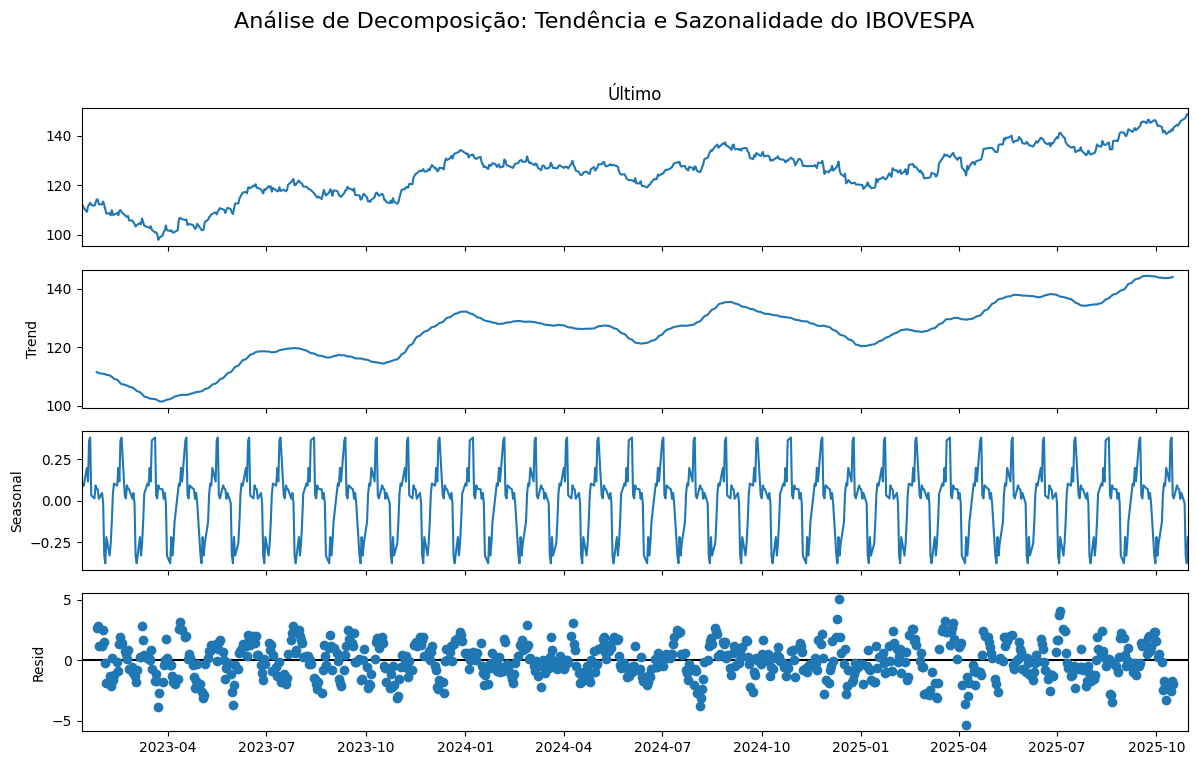

In [4]:
# Visualização da decomposição
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Análise de Decomposição: Tendência e Sazonalidade do IBOVESPA', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Teste de Estacionaridade (ADF)

In [5]:
def testa_estacionalidade(serie):
    resultado = adfuller(serie)
    print(f'Estatística ADF: {resultado[0]:.4f}')
    print(f'P-valor: {resultado[1]:.4f}')
    if resultado[1] <= 0.05:
        print("Resultado: A série é ESTACIONÁRIA (rejeita H0)")
    else:
        print("Resultado: A série NÃO é estacionária (falha em rejeitar H0)")


In [6]:
print("Teste para Preços de Fechamento:")
testa_estacionalidade(df['Último'])

Teste para Preços de Fechamento:
Estatística ADF: -0.8325
P-valor: 0.8094
Resultado: A série NÃO é estacionária (falha em rejeitar H0)


In [7]:
print("\nTeste com Diferença dos Preços:")
testa_estacionalidade(df['Último'].diff().dropna())


Teste com Diferença dos Preços:
Estatística ADF: -26.7921
P-valor: 0.0000
Resultado: A série é ESTACIONÁRIA (rejeita H0)


Na primeira diferenciação já temos uma série estacionária

# Função ACF e PACF

Utilizei as funções ACF e PACF para encontrar os parâmetros do modelo ARIMA

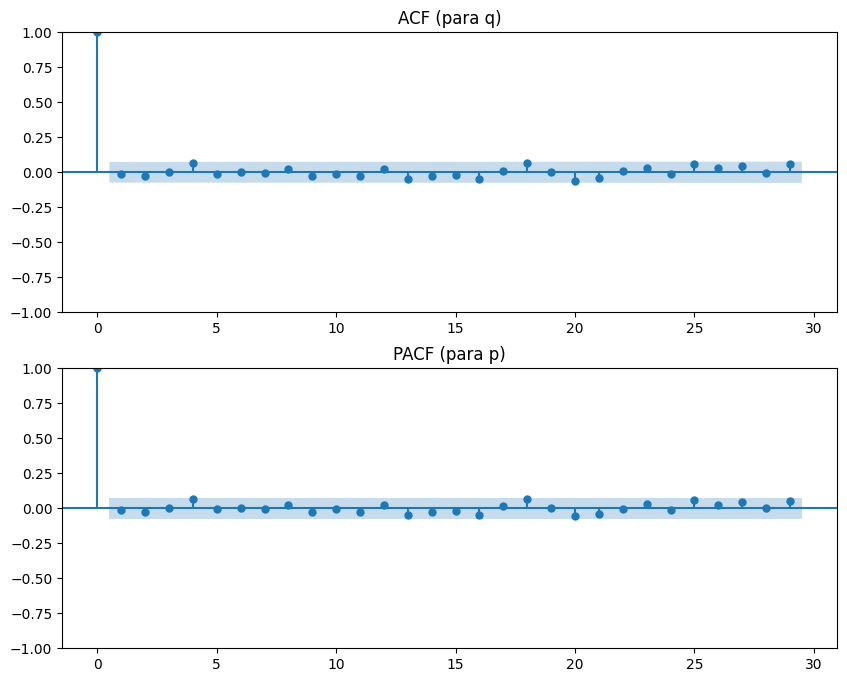

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['Último'].diff().dropna(), ax=ax1, title='ACF (para q)')
plot_pacf(df['Último'].diff().dropna(), ax=ax2, title='PACF (para p)')
plt.show()

# ARIMA

In [9]:
# Preparação dos Dados
df_arima = df.set_index('Data')['Último'].asfreq('B').fillna(method='ffill')

# Divisão em Treino e Teste
train = df_arima.iloc[:-30]
test = df_arima.iloc[-30:]

# Treinamento e Previsão (Walk-Forward)
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model_arima = ARIMA(history, order=(1, 1, 1))
    model_fit = model_arima.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])

In [10]:
# Criando o DataFrame de resultados 
df_results = pd.DataFrame({
    'Real': test.values, 
    'Previsto': predictions
}, index=test.index)
df_results['Real_Ontem'] = df_arima.shift(1).loc[test.index].values

In [11]:
# Transformação em Tendência Binária
y_real_arima = (df_results['Real'] > df_results['Real_Ontem']).astype(int)
y_pred_arima = (df_results['Previsto'] > df_results['Real_Ontem']).astype(int)

In [12]:
# Avaliação do Modelo
acc = accuracy_score(y_real_arima, y_pred_arima)
print(f"\nAcurácia ARIMA: {acc:.2%}")
print("\nRelatório de Classificação - ARIMA:")
print(classification_report(y_real_arima, y_pred_arima))


Acurácia ARIMA: 53.33%

Relatório de Classificação - ARIMA:
              precision    recall  f1-score   support

           0       0.44      0.67      0.53        12
           1       0.67      0.44      0.53        18

    accuracy                           0.53        30
   macro avg       0.56      0.56      0.53        30
weighted avg       0.58      0.53      0.53        30



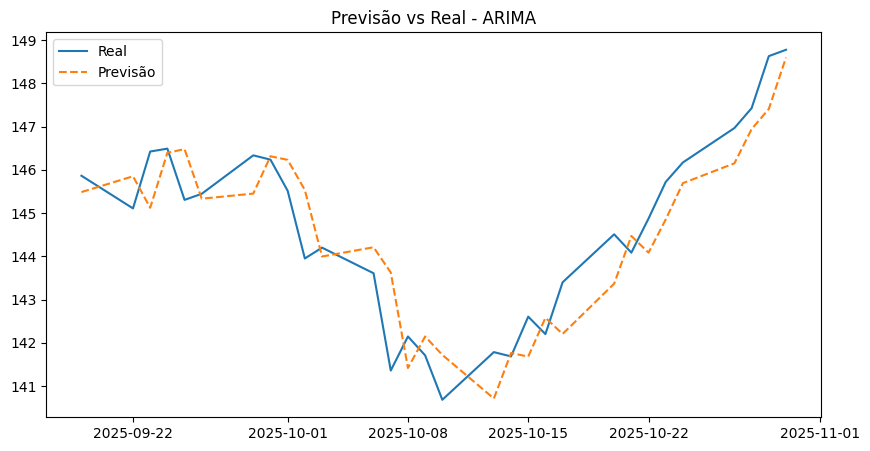

In [13]:
# Gráfico de Previsão vs Real - ARIMA
plt.figure(figsize=(10, 5))
plt.plot(df_results.index, df_results['Real'], label='Real')
plt.plot(df_results.index, df_results['Previsto'], label='Previsão', linestyle='--')
plt.title('Previsão vs Real - ARIMA')
plt.legend()
plt.show()

# Auto Arima

In [14]:
# Preparação da Série para Auto ARIMA
df_autoarima = df.set_index('Data')['Último'].asfreq('B').fillna(method='ffill')

# Divisão em Treino e Teste
train = df_autoarima.iloc[:-30]
test = df_autoarima.iloc[-30:]

In [15]:
# Encontrando o melhor modelo ARIMA via Grid Search
def melhor_arima(timeseries):
    melhor_aic = float("inf")
    melhor_ordem = None

    # Testa combinações de p, d, q
    print("Buscando os melhores parâmetros...")
    for p in range(5):
        for q in range(5):
            try:
                model = ARIMA(timeseries, order=(p, 1, q))
                resultado = model.fit()
                if resultado.aic < melhor_aic:
                    melhor_aic = resultado.aic
                    melhor_ordem = (p, 1, q)
            except:
                continue
    return melhor_ordem

melhor_ordem = melhor_arima(train)
print(f"Melhor Modelo Encontrado: ARIMA{melhor_ordem}")

history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=melhor_ordem)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])

Buscando os melhores parâmetros...
Melhor Modelo Encontrado: ARIMA(4, 1, 4)


In [16]:
# Criar colunas de direção dos resultados
df_res = pd.DataFrame({'Real': test.values, 'Previsto': predictions}, index=test.index)
df_res['Ontem'] = df_autoarima.shift(1).loc[test.index].values
df_res['Dir_Real'] = (df_res['Real'] > df_res['Ontem']).astype(int)
df_res['Dir_Pred'] = (df_res['Previsto'] > df_res['Ontem']).astype(int)

In [17]:
# Avaliação do Auto ARIMA
acc = accuracy_score(df_res['Dir_Real'], df_res['Dir_Pred'])
print(f"\nAcurácia Auto ARIMA: {acc:.2%}")
print("\nRelatório de Classificação - Auto ARIMA:")
print(classification_report(df_res['Dir_Real'], df_res['Dir_Pred']))


Acurácia Auto ARIMA: 56.67%

Relatório de Classificação - Auto ARIMA:
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.67      0.56      0.61        18

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.56        30
weighted avg       0.59      0.57      0.57        30



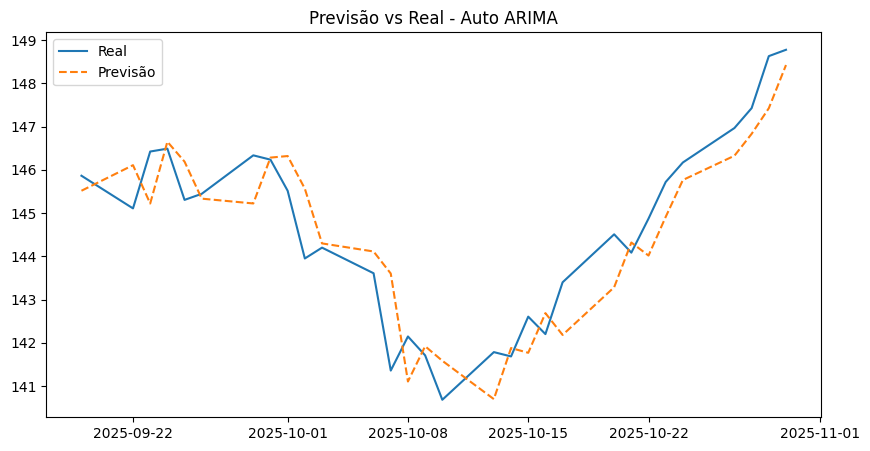

In [18]:
# Gráfico de Previsão vs Real - Auto Arima
plt.figure(figsize=(10, 5))
plt.plot(df_res.index, df_res['Real'], label='Real')
plt.plot(df_res.index, df_res['Previsto'], label='Previsão', linestyle='--')
plt.title('Previsão vs Real - Auto ARIMA')
plt.legend()
plt.show()